**Q1.k-Nearest Neighbours Classifier on Synthetic Data.**


**[2pts] Create the data set.**

You will “train” a kNN classifier on the following training data:

• The data is 2-dimensional points in a grid, such that the x1-coordinates and x2-coordinates both range
from −1.5 . . . 1.5, with a spacing of 0.1 between points.

• A training point, x = (x1, x2), will be classified as follows:
– Class 1 if ||x||2 ≤ 1
– Class 2 otherwise
Write code that generates this dataset and displays it using a scatterplot, using different colours for each
class.


In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
#import intertools

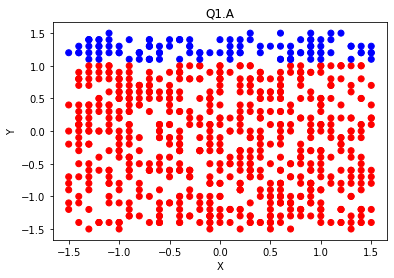

In [19]:
def plotScatter(xData, yData, colors):
    plt.scatter(xData, yData,color=colors)
    plt.title('Q1.A')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def createRandomPoints(low, high, size):
    x = np.random.uniform(low=low, high=high, size =size)
    x = np.around(x,1)
    x = x.reshape([int(size/2),2])
    xData = x[:,0]
    yData = x[:,1]
    return xData, yData

def createColoredClasses():
    colors = []
    for y in yData:
      if y <= 1:
        colors.append('red')
      else:
        colors.append('blue')
    return colors

xData, yData = createRandomPoints(-1.5,1.5,1500) 
colors = createColoredClasses()
plotScatter(xData, yData, colors)



In [20]:
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],2) <= 1 else 2)
    return Data, yData

def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test
    

In [21]:
100*70/100


70.0

In [22]:
x = [.5,.5]
np.linalg.norm([x[0],x[1]],2)

0.7071067811865476

In [53]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)


In [54]:
class KNN:
    def __init__(self, k, num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = []
    def euclidean_distance(point1,point2): 
        return np.linalg.norm(point1-point2)
    def train(self, training_data, training_labels):
        self.parameters = []
        self.parameters.append(training_data)
        self.parameters.append(training_labels)
        pass
    def predict(self,X):
        def get_key(item):
            return item[0]
        
        def average_prediction(k, points):
            def most_common(l):
                return max(set(l),key=l.count)
            closest_points = []
            for i in range(k):
                closest_points.append(points[i])
            class_values = []
            for point in closest_points:
                class_values.append(point[2])
            return most_common(class_values)
            
        prediction = []
        for point in X:
            closest_points = []
            for training_point, classification in zip(self.parameters[0],self.parameters[1]):
                dist = np.linalg.norm(point-training_point)
                closest_points.append([dist,training_point,classification])
            
            sorted_closest_points = sorted(closest_points,key=get_key)
            prediction.append(average_prediction(self.k,sorted_closest_points))
        return prediction
    def accuracy(self, data, labels):
        num_correct = 0
        total = len(labels)
        for i in range(len(labels)):
            if(data[i]==labels[i]):
                num_correct += 1
        return num_correct/total    



In [55]:
clf = KNN(k=3, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.98

Q2

In [58]:
import pandas as pd

train = pd.io.parsers.read_csv("mnist_train.csv")
train
#train = np.loadtxt(open("mnist_train.csv", "rb"), delimiter=",", skiprows=1)
#test = np.loadtxt(open("mnist_test.csv", "rb"), delimiter=",", skiprows=1)


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
print(train)


[[0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]]


In [33]:
y_train.dtypes

dtype('int64')

In [28]:
clf = KNN(k=1, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

TypeError: unsupported operand type(s) for -: 'str' and 'str'